In [46]:
import torch
import scanpy as sc
import numpy as np
import h5py

import torch.nn as nn
from MaskedLinear import MaskedLinear, DetMaskLinear

from slalom import plotFactors

In [16]:
adata = sc.read('mouse_retina_sbs.h5ad')

In [17]:
select_genes = adata.varm['I'].sum(1)>0

In [18]:
adata._inplace_subset_var(select_genes)

In [19]:
adata.X-=adata.X.mean(0)

In [6]:
adata.uns['terms']

array(['TRANSLATION', 'SIGNALING_BY_RHO_GTPASES',
       'METABOLISM_OF_NON_CODING_RNA', 'SIGNALLING_BY_NGF',
       'SIGNALING_BY_SCF_KIT', 'DEVELOPMENTAL_BIOLOGY',
       'TRIF_MEDIATED_TLR3_SIGNALING', 'CELL_CELL_COMMUNICATION',
       'MEIOSIS', 'MEMBRANE_TRAFFICKING',
       'METABOLISM_OF_VITAMINS_AND_COF', 'CELL_CYCLE',
       'SIGNALING_BY_ERBB4', 'ANTIVIRAL_MECHANISM_BY_IFN_STI',
       'SIGNALING_BY_ERBB2', 'SIGNALING_BY_EGFR_IN_CANCER',
       'SRP_DEPENDENT_COTRANSLATIONAL_', 'PPARA_ACTIVATES_GENE_EXPRESSIO',
       'DOWNSTREAM_SIGNALING_EVENTS_OF', 'SIGNALING_BY_THE_B_CELL_RECEPT',
       'EXTRACELLULAR_MATRIX_ORGANIZAT', 'SIGNALING_BY_NOTCH1',
       'INSULIN_RECEPTOR_SIGNALLING_CA', 'CELL_SURFACE_INTERACTIONS_AT_T',
       'NGF_SIGNALLING_VIA_TRKA_FROM_T', 'COLLAGEN_FORMATION',
       'SIGNALING_BY_FGFR_IN_DISEASE', 'PHOSPHOLIPID_METABOLISM',
       'GASTRIN_CREB_SIGNALLING_PATHWA', 'GLYCOSAMINOGLYCAN_METABOLISM',
       'MHC_CLASS_II_ANTIGEN_PRESENTAT', 'PROCESSING_OF_C

In [21]:
select_terms = lambda t1, t2: np.where(np.logical_or(adata.uns['terms']==t1, adata.uns['terms']==t2))[0]

### Plot of average values for active genes of terms 'INFLAMMASOMES', 'ASTROCYTES'

In [49]:
terms = select_terms('INFLAMMASOMES', 'ASTROCYTES')
terms_vars_mean = adata.varm['I'][:, terms]
terms_vars_mean=terms_vars_mean/terms_vars_mean.sum(0)
vars_mean = np.matmul(adata.X, terms_vars_mean)

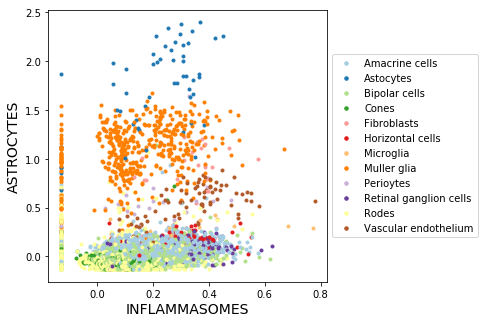

In [50]:
fg = plotFactors(terms=['INFLAMMASOMES', 'ASTROCYTES'], X=vars_mean, lab=adata.obs['cell_type'], isCont=False)

### Plot of average values for active genes of terms 'CELL_CYCLE', 'ASTROCYTES'

In [51]:
terms = select_terms('CELL_CYCLE', 'ASTROCYTES')
terms_vars_mean = adata.varm['I'][:, terms]
terms_vars_mean=terms_vars_mean/terms_vars_mean.sum(0)
vars_mean = np.matmul(adata.X, terms_vars_mean)

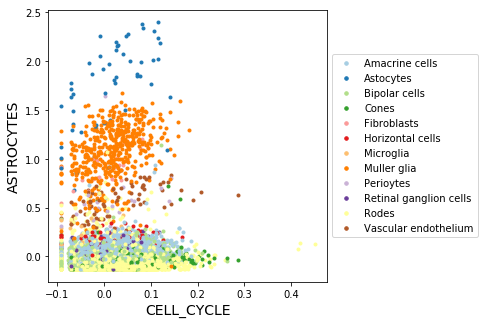

In [52]:
fg = plotFactors(terms=['CELL_CYCLE', 'ASTROCYTES'], X=vars_mean, lab=adata.obs['cell_type'], isCont=False)

### Latent variables from the first layer of the encoder with stochastic mask and sparse second layer

In [10]:
autoencoder = torch.load('auto_masked.pt')
autoencoder.eval()

MaskedAutoencoder(
  (encoder): Sequential(
    (0): MaskedLinear(in_features=939, out_features=140, bias=False)
    (1): ELU(alpha=1.0)
    (2): MaskedLinear(in_features=140, out_features=50, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=50, out_features=140, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=140, out_features=939, bias=True)
  )
)

In [20]:
t_X = torch.from_numpy(adata.X)

In [25]:
terms = select_terms('INFLAMMASOMES', 'ASTROCYTES')
vars_latent = autoencoder.encoder[0](t_X).data
vars_latent = vars_latent[:, terms].numpy()

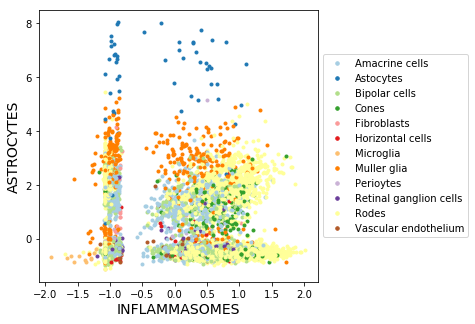

In [28]:
fg = plotFactors(terms=['INFLAMMASOMES', 'ASTROCYTES'], X=vars_latent, lab=adata.obs['cell_type'], isCont=False)

In [29]:
terms = select_terms('CELL_CYCLE', 'ASTROCYTES')
vars_latent = autoencoder.encoder[0](t_X).data
vars_latent = vars_latent[:, terms].numpy()

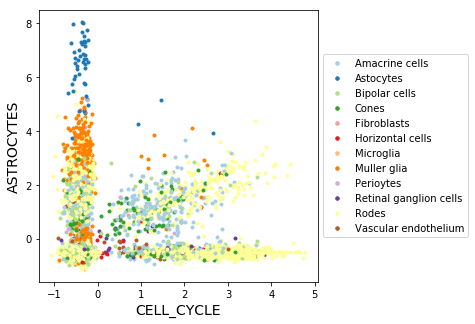

In [30]:
fg = plotFactors(terms=['CELL_CYCLE', 'ASTROCYTES'], X=vars_latent, lab=adata.obs['cell_type'], isCont=False)

### Latent variables from the first layer of the encoder with stochastic mask and dense second layer

In [34]:
autoencoder = torch.load('auto_masked_2nd_lin.pt')
autoencoder.eval()

MaskedLinAutoencoder(
  (encoder): Sequential(
    (0): MaskedLinear(in_features=939, out_features=140, bias=False)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=140, out_features=50, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=50, out_features=140, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=140, out_features=939, bias=True)
  )
)

In [35]:
terms = select_terms('INFLAMMASOMES', 'ASTROCYTES')
vars_latent = autoencoder.encoder[0](t_X).data
vars_latent = vars_latent[:, terms].numpy()

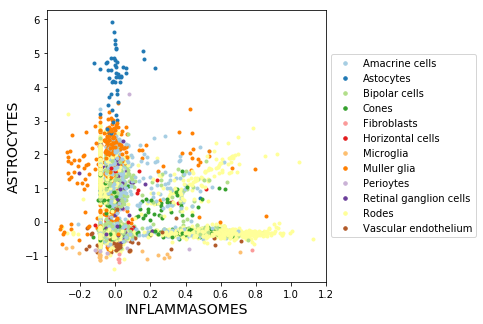

In [36]:
fg = plotFactors(terms=['INFLAMMASOMES', 'ASTROCYTES'], X=vars_latent, lab=adata.obs['cell_type'], isCont=False)

In [37]:
terms = select_terms('CELL_CYCLE', 'ASTROCYTES')
vars_latent = autoencoder.encoder[0](t_X).data
vars_latent = vars_latent[:, terms].numpy()

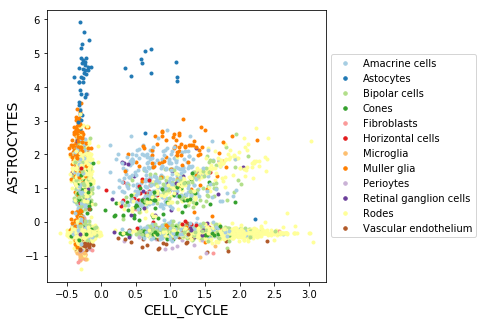

In [38]:
fg = plotFactors(terms=['CELL_CYCLE', 'ASTROCYTES'], X=vars_latent, lab=adata.obs['cell_type'], isCont=False)

### Latent variables from the first layer of the encoder with deterministic mask

In [39]:
autoencoder = torch.load('auto_masked_det.pt')
autoencoder.eval()

DetAutoencoder(
  (encoder): Sequential(
    (0): DetMaskLinear(in_features=939, out_features=140, bias=False)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=140, out_features=50, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=50, out_features=140, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=140, out_features=939, bias=True)
  )
)

In [40]:
terms = select_terms('INFLAMMASOMES', 'ASTROCYTES')
vars_latent = autoencoder.encoder[0](t_X).data
vars_latent = vars_latent[:, terms].numpy()

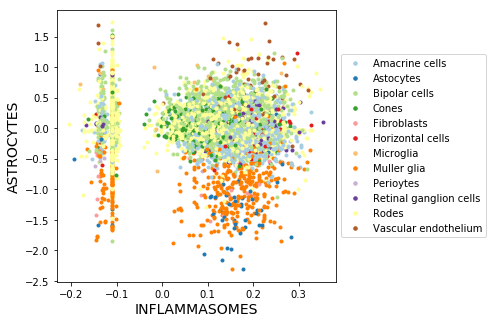

In [41]:
fg = plotFactors(terms=['INFLAMMASOMES', 'ASTROCYTES'], X=vars_latent, lab=adata.obs['cell_type'], isCont=False)

In [42]:
terms = select_terms('CELL_CYCLE', 'ASTROCYTES')
vars_latent = autoencoder.encoder[0](t_X).data
vars_latent = vars_latent[:, terms].numpy()

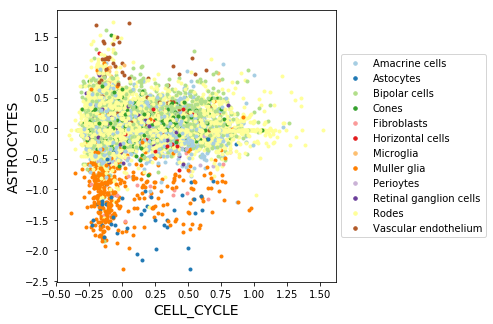

In [43]:
fg = plotFactors(terms=['CELL_CYCLE', 'ASTROCYTES'], X=vars_latent, lab=adata.obs['cell_type'], isCont=False)

### Plots from slalom model

In [47]:
fa = h5py.File('FA.hdf5')

In [56]:
all_terms = fa['terms'][()]
select_terms = lambda t1, t2: np.where(np.logical_or(all_terms==t1, all_terms==t2))[0]

In [61]:
terms = select_terms(b'INFLAMMASOMES', b'ASTROCYTES')

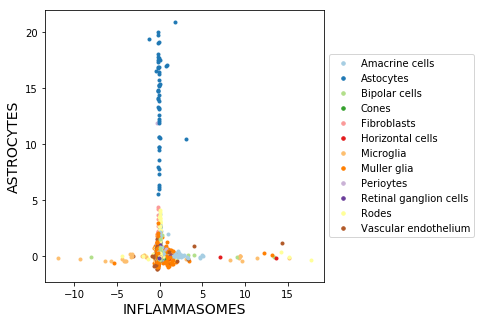

In [63]:
fg = plotFactors(terms=['INFLAMMASOMES', 'ASTROCYTES'], X=fa['X'][:, terms], lab=adata.obs['cell_type'], isCont=False)

In [64]:
terms = select_terms(b'CELL_CYCLE', b'ASTROCYTES')

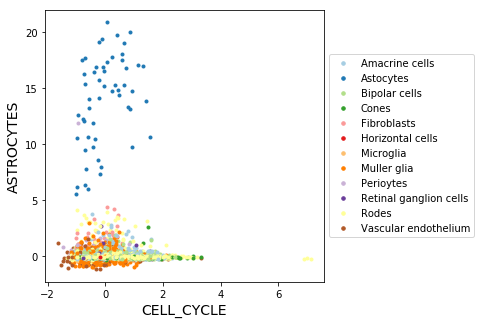

In [65]:
fg = plotFactors(terms=['CELL_CYCLE', 'ASTROCYTES'], X=fa['X'][:, terms], lab=adata.obs['cell_type'], isCont=False)